In [15]:
#Install Dependencies

!pip install tensorflow
!pip install h5py graphviz pydot
!pip install nbconvert
!pip install widgetsnbextension~=2.0.0
!pip install keras
!pip install matplotlib
!pip install scikit-plot


    100% |████████████████████████████████| 276kB 7.1MB/s ta 0:00:01


In [25]:
#Import Library
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout

#Data Visualization depedencies
import scikitplot as skplt
from matplotlib import pyplot as plt
%matplotlib inline

#Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# 1) Preprocessing

In [26]:
#Read the Dataset
(x,y),(x_test,y_test) = mnist.load_data()

Label = [5 0 4 1 9 2 1 3 1]


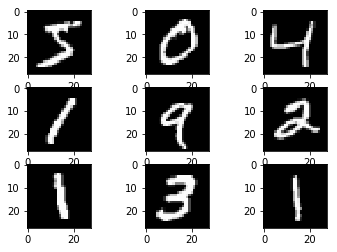

In [27]:
#Visualize the Dataset

# Image index, you can pick any number between 0 and length of dataset
img_index = range(0, 9)
# y_train contains the lables, ranging from 0 to 9
label_index = y[img_index]

print ("Label = " + str(label_index) )

for i in img_index:
    plt.subplot(330 + (i+1))
    # # Show one of the images from the training dataset
    plt.imshow(x[i],cmap='gray')

In [28]:
print("Input Shape: ", x.shape)
print("Test Input Shape: ", x_test.shape)
print("Classes Shape: ", y.shape)
print("Test Classes Shape: ", y_test.shape)

Input Shape:  (60000, 28, 28)
Test Input Shape:  (10000, 28, 28)
Classes Shape:  (60000,)
Test Classes Shape:  (10000,)


In [29]:
# Reshape, one-hot encode & Normalization of Input Data

#Reshape Inpute Features
x = x.reshape(60000,784)
x_test = x_test.reshape(10000,784)

#convert float types
x = x.astype('float32')
x_test = x_test.astype('float32')

#normalize between 0 to 1
x /= 255
x_test /= 255

#Convert one-hot encode into Classes
y = to_categorical(y,10)                      #10 classes
y_test = to_categorical(y_test,10)


In [30]:
#ReCheck Changes
print("Input Shape: ", x.shape)
print("Test Input Shape: ", x_test.shape)
print("Classes Shape: ", y.shape)
print("Test Classes Shape: ", y_test.shape)

Input Shape:  (60000, 784)
Test Input Shape:  (10000, 784)
Classes Shape:  (60000, 10)
Test Classes Shape:  (10000, 10)


In [31]:
# Train, Validation, Test Split

#Shuffle
x,y = shuffle(x,y,random_state=1)

#Convert dataset into train and test part (20% data as test set)
x_train , x_valid , y_train , y_valid = train_test_split(x,y,test_size=0.20)

In [32]:
#Final Check
print("Train Input Shape: ", x_train.shape)
print("Valid Input Shape: ", x_valid.shape)
print("Test Input Shape: ", x_test.shape)
print("Train Classes Shape: ", y_train.shape)
print("Valid Classes Shape: ", y_valid.shape)
print("Test Classes Shape: ", y_test.shape)

Train Input Shape:  (48000, 784)
Valid Input Shape:  (12000, 784)
Test Input Shape:  (10000, 784)
Train Classes Shape:  (48000, 10)
Valid Classes Shape:  (12000, 10)
Test Classes Shape:  (10000, 10)


# 2) Model 

### 2.1) Create Sequential Model (Add layer to it one by one using add fuction)

### 2.2) Compile the Model (Defien Loss Function, Define Optimizer, Define Evaluation Metric)

### 2.3) Train the Model (Fit the Model with Input Data (x_train,y_train,x_valid,y_valid))

In [33]:
# 2.1) Create Sequential Model
model = Sequential()

#Add layer one by one to Sequential Model
#Initialize for first layer
model.add(Dense(512,activation='relu',
               input_shape=(784,)))           
model.add(Dropout(0.2))

#Hidden Layer 1
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

#Final Output Layer
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Initialize the losses function , Initialize the optimizer
from keras.optimizers import SGD

#Parameter
batch_size = 128
epochs = 20
Learning_rate= 0.01
momentum = 0.9

#Initialize stochastic gradient descent optimizer
sgd = SGD(lr=Learning_rate,
         decay=1e-6,
         momentum=momentum)

#Tensorboard Operation
writer = tf.summary.FileWriter('./log', tf.get_default_graph())
writer.close()

In [37]:
# 2.2) Compile the model

#model.compile(loss='categorical_crossentropy',optimizer=sgd,
#             metrics = ['accuracy'])

model.compile(loss='categorical_crossentropy',optimizer='Adam',
             metrics = ['accuracy'])

In [40]:
# 2.3) Fit the Model (Train the Model with Data)


model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_valid,y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s - loss: 0.0129 - acc: 0.9960 - val_loss: 0.1017 - val_acc: 0.9787
Epoch 2/20
48000/48000 [==============================] - 5s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0950 - val_acc: 0.9806
Epoch 3/20
48000/48000 [==============================] - 5s - loss: 0.0120 - acc: 0.9961 - val_loss: 0.1095 - val_acc: 0.9787
Epoch 4/20
48000/48000 [==============================] - 5s - loss: 0.0167 - acc: 0.9947 - val_loss: 0.1044 - val_acc: 0.9808
Epoch 5/20
48000/48000 [==============================] - 5s - loss: 0.0144 - acc: 0.9952 - val_loss: 0.0981 - val_acc: 0.9815
Epoch 6/20
48000/48000 [==============================] - 5s - loss: 0.0117 - acc: 0.9965 - val_loss: 0.1048 - val_acc: 0.9801
Epoch 7/20
48000/48000 [==============================] - 5s - loss: 0.0137 - acc: 0.9954 - val_loss: 0.1116 - val_acc: 0.9796
Epoch 8/20
48000/48000 [==============================] - 5s 

# 3) Model Evaluation , Save Weights, Load Weights

In [42]:
#Score on Test data
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Losess: ',score[0])
print('Test accuracy: ',score[1])

Test Losess:  0.118375941991
Test accuracy:  0.981


In [45]:
from sklearn.metrics import confusion_matrix

#predict on Validation set 
predict = model.predict(x_test,verbose=1)   #verbose = animation arrow

#Confusion Metrix of Validation Data
print(confusion_matrix(y_test.argmax(axis=1), predict.argmax(axis=1)))


 9152/10000 [==========================>...] - ETA: 0s[[ 972    0    2    1    0    0    2    1    2    0]
 [   0 1126    3    1    0    2    1    1    1    0]
 [   6    0 1011    2    1    0    3    6    3    0]
 [   0    0    4  997    0    3    0    2    1    3]
 [   3    1    3    0  945    0   10    4    1   15]
 [   3    0    0    5    0  875    5    0    2    2]
 [   2    2    0    1    0    2  951    0    0    0]
 [   3    1   14    0    0    0    0 1006    1    3]
 [   2    0    3    8    1    6    2    4  941    7]
 [   5    2    0    1    6    3    1    2    3  986]]
